In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Project2_Classification_HouseGrade_Data_Project-625edbc5-68f4-4fe4-97f2-29ba63a71a0e.csv')
df.head()

Id  Area(total)  Trooms  Nbedrooms  Nbwashrooms  Twashrooms roof  \
0   1          339       6          5            4           6   NO   
1   2          358       5          4            3           4  YES   
2   3          324       7          5            4           5  YES   
3   4          330       6          4            3           5  YES   
4   5          320       7          4            4           5   NO   

   Roof(Area)  Lawn(Area)  Nfloors  API  ANB  Expected price Grade  
0           0          76        2   79    6            3481     D  
1          71          96        3   72    4            3510     D  
2         101         117        5   64    3            3748     C  
3         101          82        2   59    2            3134     D  
4           0          75        3   40    1            3843     D

In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [4]:
df.shape

(3000, 14)

In [5]:
df['Grade'].unique()


array(['D', 'C', 'B', 'A', 'E'], dtype=object)

In [6]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [8]:
df.describe()

Id  Area(total)       Trooms    Nbedrooms  Nbwashrooms  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean   1500.500000   325.117000     7.021667     5.023000     4.513667   
std     866.169729    20.507742     1.421221     1.634838     1.715263   
min       1.000000   290.000000     5.000000     2.000000     1.000000   
25%     750.750000   308.000000     6.000000     4.000000     3.000000   
50%    1500.500000   325.000000     7.000000     5.000000     4.000000   
75%    2250.250000   343.000000     8.000000     6.000000     6.000000   
max    3000.000000   360.000000     9.000000     8.000000     8.000000   

        Twashrooms   Roof(Area)   Lawn(Area)      Nfloors          API  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean      6.010667    48.980667    95.609333     4.013333    70.190667   
std       1.786136    48.746641    14.837388     1.621532    17.563460   
min       2.000000     0.000000    70.000000     1.000000    40.000000   
25%       5.000000     0.000000    83.000000     3.000000    55.000000   
50%       6.000000    71.000000    96.000000     4.000000    70.000000   
75%       7.000000    96.000000   109.000000     5.000000    85.000000   
max      10.000000   120.000000   120.000000     7.000000   100.000000   

              ANB  Expected price  
count  3000.00000     3000.000000  
mean      3.47900     3782.938333  
std       1.69426      567.189995  
min       1.00000     2504.000000  
25%       2.00000     3354.000000  
50%       4.00000     3771.000000  
75%       5.00000     4208.000000  
max       6.00000     5216.000000

In [9]:
df.columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

In [10]:
for i in df.columns:
    print(i,':',df[i].nunique())

Id : 3000
Area(total) : 71
Trooms : 5
Nbedrooms : 7
Nbwashrooms : 8
Twashrooms : 9
roof : 2
Roof(Area) : 52
Lawn(Area) : 51
Nfloors : 7
API : 61
ANB : 6
Expected price : 1647
Grade : 5


In [11]:
for i in df.columns:
    print(i,':',df[i].unique())

Id : [   1    2    3 ... 2998 2999 3000]
Area(total) : [339 358 324 330 320 314 332 323 351 308 309 303 321 345 307 337 333 343
 322 326 329 292 298 296 354 318 301 352 348 304 336 355 299 349 310 344
 338 312 328 342 335 359 313 334 300 302 317 306 341 293 294 327 311 347
 290 360 316 295 315 331 305 356 346 357 350 297 325 291 340 353 319]
Trooms : [6 5 7 8 9]
Nbedrooms : [5 4 7 8 6 3 2]
Nbwashrooms : [4 3 6 7 5 2 8 1]
Twashrooms : [ 6  4  5  7  9  8  3  2 10]
roof : ['NO' 'YES']
Roof(Area) : [  0  71 101  81 103  89  74 116  95  77 118 115  78  87 112  73 111  90
  84 117  93  82 102 113 108 107 110 109 105  96  86  75  98  91 106 100
  97  80  88  85  79  83 104  76 119  72 120 114  94  70  92  99]
Lawn(Area) : [ 76  96 117  82  75  93 120  95  97 111 105 115 109  84  80  83  81 104
 113 112 116 100 107  94  71  77 114  72 119  86  91  74  85 110  70  88
 106  73 103 108 101  79 102  87  92  99 118  90  98  89  78]
Nfloors : [2 3 5 6 1 4 7]
API : [ 79  72  64  59  40  93  87  82  4

In [12]:
cat=[]
con=[]
for i in df.columns:
    if df[i].nunique()<10:
        cat.append(i)
    else:
        con.append(i)
print(tabulate({'Cat':cat,'Con':con},headers=['Categorical','Continuous']))            

Categorical    Continuous
-------------  --------------
Trooms         Id
Nbedrooms      Area(total)
Nbwashrooms    Roof(Area)
Twashrooms     Lawn(Area)
roof           API
Nfloors        Expected price
ANB
Grade


<AxesSubplot:xlabel='Expected price', ylabel='Density'>

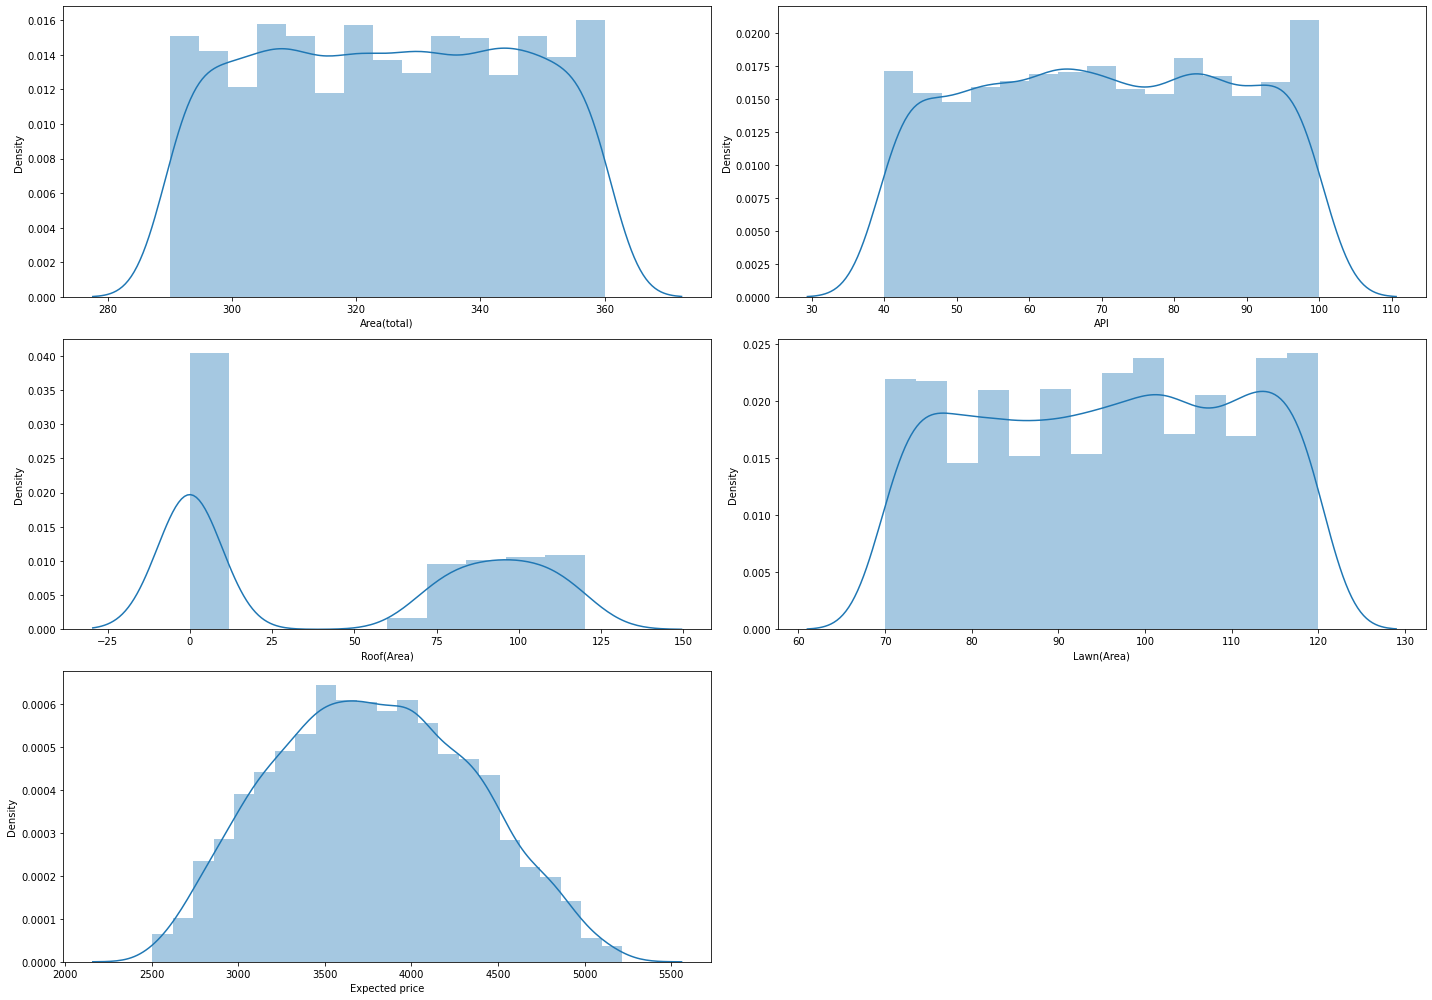

In [13]:
plt.subplots(figsize=(20,14),tight_layout=True)
plt.subplot(3, 2, 1)
sns.distplot(df['Area(total)'])
plt.subplot(3, 2, 3)
sns.distplot(df['Roof(Area)'])
plt.subplot(3, 2, 4)
sns.distplot(df['Lawn(Area)'])
plt.subplot(3,2,2)
sns.distplot(df['API'])
plt.subplot(3,2,5)
sns.distplot(df['Expected price'])

<AxesSubplot:xlabel='Grade', ylabel='count'>

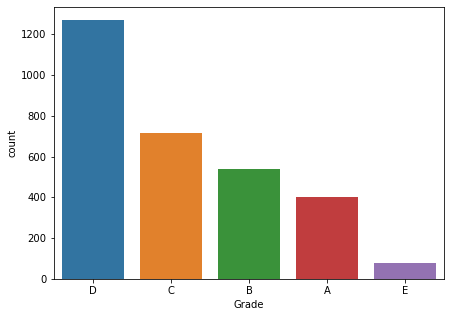

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(df['Grade'])

<AxesSubplot:xlabel='roof', ylabel='count'>

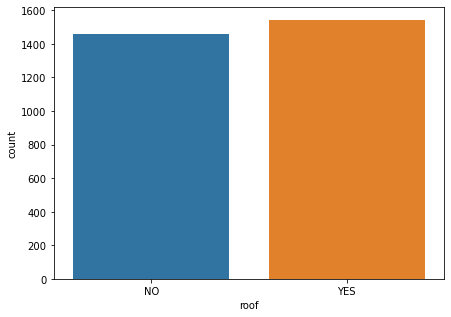

In [15]:
plt.figure(figsize=(7,5))
sns.countplot(df['roof'])

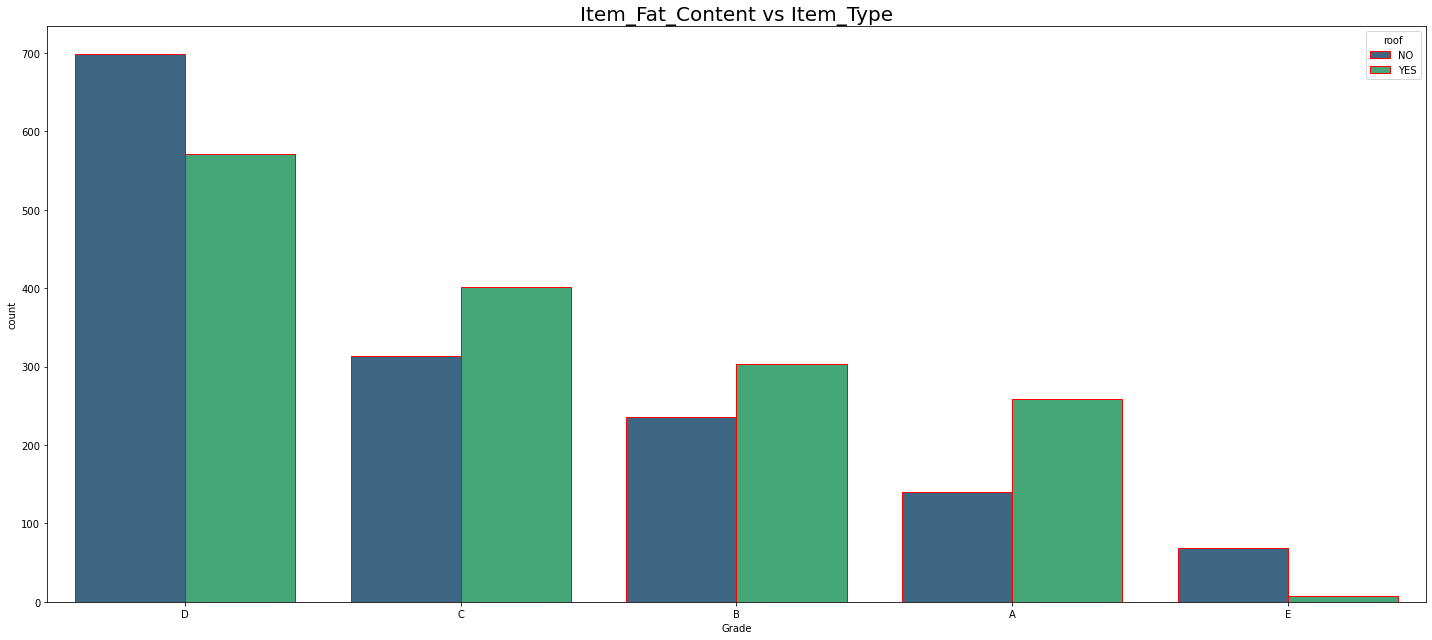

In [16]:
fig, ax = plt.subplots(figsize = (20, 9))
sns.countplot(x = "Grade", hue = "roof", data = df,palette='viridis',edgecolor='r')
plt.title('Item_Fat_Content vs Item_Type',fontsize=20)
plt.tight_layout()
plt.show()

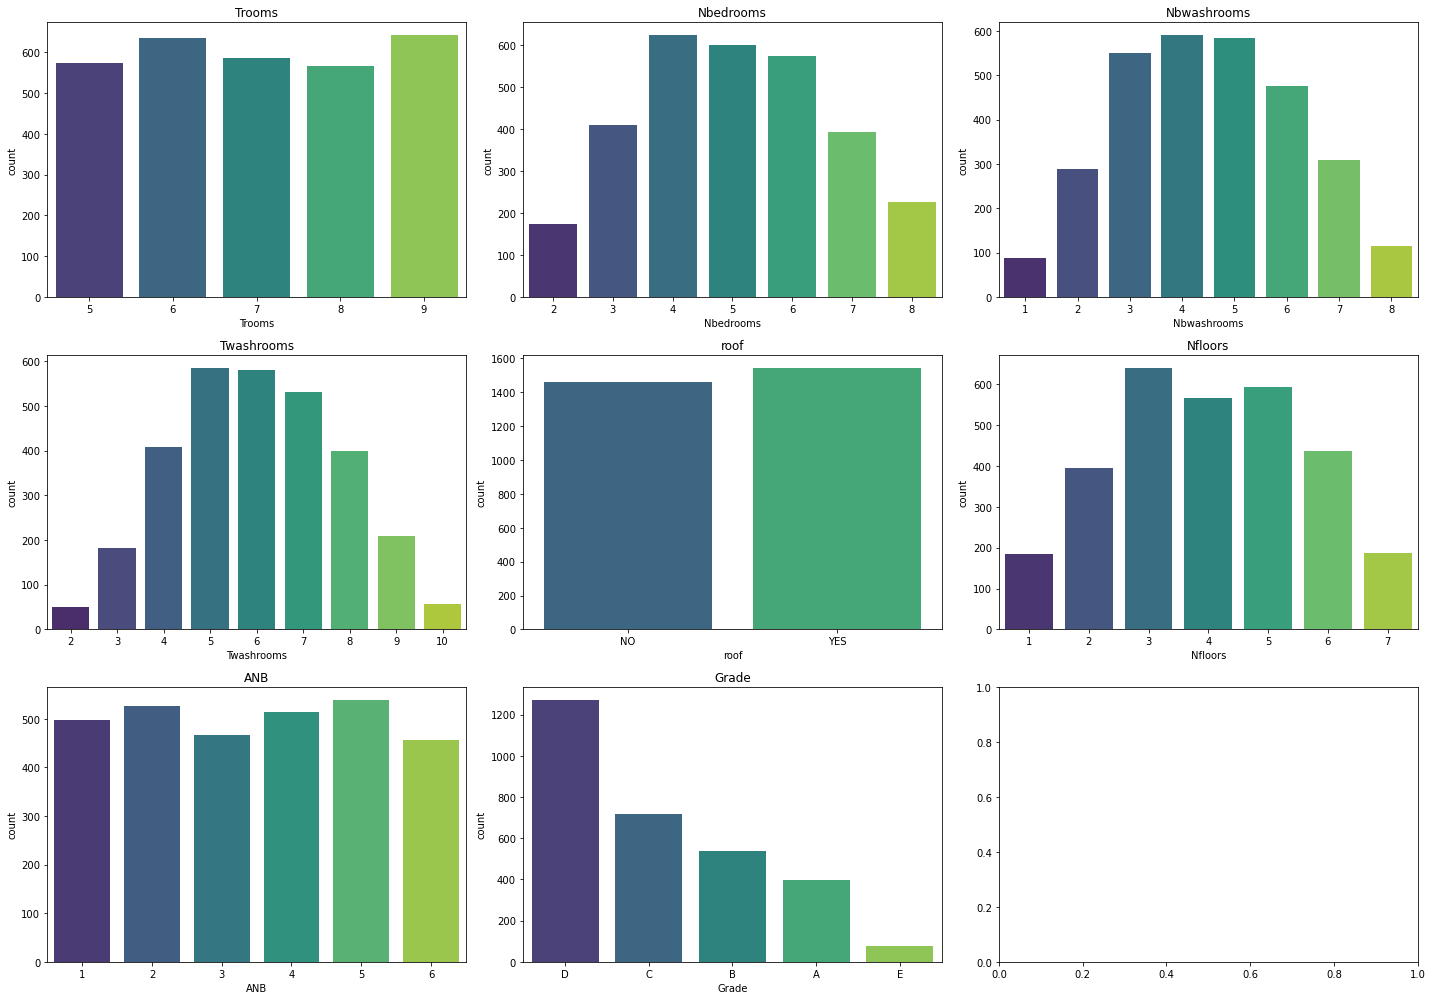

In [17]:

r=3
c=int(len(cat)/r)+1

figs,axes =plt.subplots(c,r,figsize=(20,14),tight_layout=True)

for i , ax in zip(cat,axes.flatten()[:len(cat)]):
    sns.countplot(data=df,x=df[i],palette='viridis',ax=ax)
    #ax.set_xlabel(i)
    ax.set_title(i)
plt.show()    

In [18]:
df.head()

Id  Area(total)  Trooms  Nbedrooms  Nbwashrooms  Twashrooms roof  \
0   1          339       6          5            4           6   NO   
1   2          358       5          4            3           4  YES   
2   3          324       7          5            4           5  YES   
3   4          330       6          4            3           5  YES   
4   5          320       7          4            4           5   NO   

   Roof(Area)  Lawn(Area)  Nfloors  API  ANB  Expected price Grade  
0           0          76        2   79    6            3481     D  
1          71          96        3   72    4            3510     D  
2         101         117        5   64    3            3748     C  
3         101          82        2   59    2            3134     D  
4           0          75        3   40    1            3843     D

In [19]:
from ipywidgets import interact

In [20]:
def cat_info(col): 
    print(f"Unique values in {df.columns[col]} are: {df.iloc[:,col].unique()}") 
    print(f"Mode of {df.columns[col]} is {df.iloc[:1,col].mode()[0]}") 
    print(f"Number of missing values in {df.columns[col]} is {df.iloc[:,col].isnull().sum()}") 
    if df.iloc[:,col].isnull().sum() > 0:  
        print(f"\nThere are null values in the {df.columns[col]} column")

In [21]:
data_df2=df[cat]
def cat_vis(col,palette='magma'):
    cat_info(col)
    
    sns.countplot(data=data_df2,x=data_df2.iloc[:,col],palette=palette)
    plt.title(data_df2.columns[col])
    plt.show()

interact(cat_vis,col=(0,len(data_df2.columns)-1,1),palette=['magma','viridis'],columns=[cat])    

interactive(children=(IntSlider(value=3, description='col', max=7), Dropdown(description='palette', options=('…

<function __main__.cat_vis(col, palette='magma')>

In [22]:
def catt_info(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") 
    print(f"Mode of {col} is {df[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") 
    if df[col].isnull().sum() > 0: 
        print(f"\nThere are null values in the {col} column")

In [23]:
catt_info('Trooms')

Unique values in Trooms are: [6 5 7 8 9]
Mode of Trooms is 9
Number of missing values in Trooms is 0


Text(0.5, 1.0, 'Count of Total Rooms in houses')

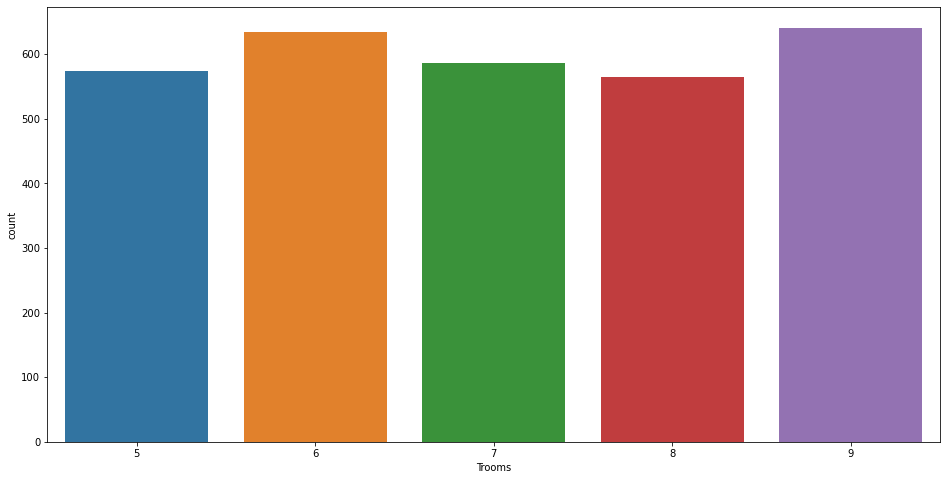

In [24]:
figs,axes = plt.subplots(figsize=(16,8))
sns.countplot(data=df,x=df['Trooms'])
ax.set_title('Count of Total Rooms in houses')

In [25]:
catt_info('Nbedrooms')

Unique values in Nbedrooms are: [5 4 7 8 6 3 2]
Mode of Nbedrooms is 4
Number of missing values in Nbedrooms is 0


Text(0.5, 1.0, 'Count of Total Bedrooms in houses')

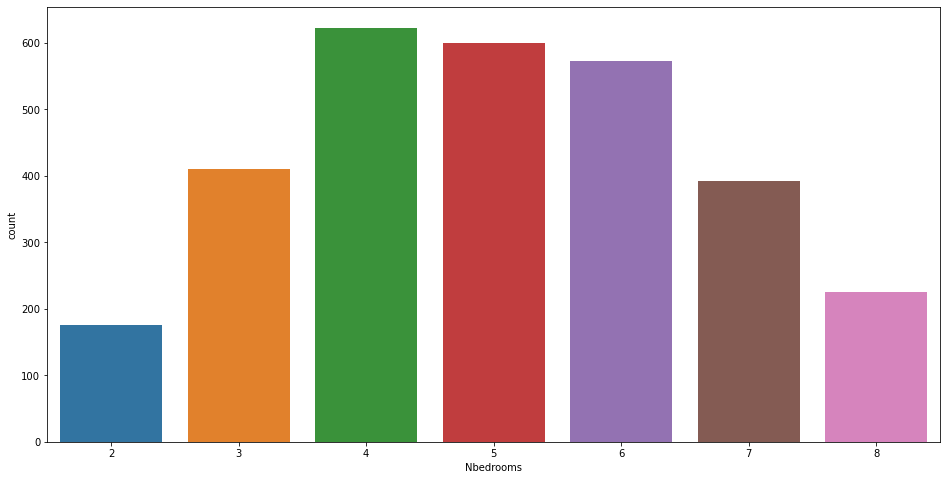

In [26]:
figs,axes = plt.subplots(figsize=(16,8))
sns.countplot(data=df,x=df['Nbedrooms'])
ax.set_title('Count of Total Bedrooms in houses')

In [27]:
catt_info('Grade')

Unique values in Grade are: ['D' 'C' 'B' 'A' 'E']
Mode of Grade is D
Number of missing values in Grade is 0


Text(0.5, 1.0, 'Grade')

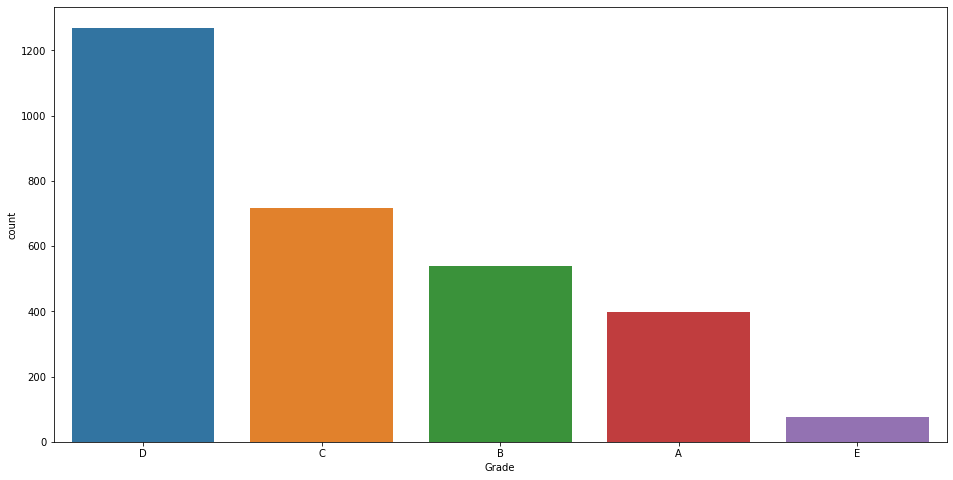

In [28]:
figs,axes = plt.subplots(figsize=(16,8))
sns.countplot(data=df,x=df['Grade'])
ax.set_title('Grade')

In [29]:
def num_info(col):
    print(f"The mean of the {df.columns[col]} is {df[df.columns[col]].mean()}")
    print(f"The median of the {df.columns[col]} is {df[df.columns[col]].median()}")
    print(f"The standard deviation of the {df.columns[col]} is {df[data_df.columns[col]].std()}")
    print(f"Number of missing values in the {df.columns[col]} is {df[data_df.columns[col]].isnull().sum()}")

In [30]:
data_df1=df[con]
def con_vis(col,palette='magma'):
 
    figs,axes = plt.subplots(1,2,figsize=(12,7))
    sns.boxplot(data=data_df1,x=data_df1.iloc[:,col],palette=palette,ax=axes[0])
    sns.histplot(data=data_df1,x=data_df1.iloc[:,col],palette=palette,ax=axes[1],kde=True)
    plt.title(data_df1.columns[col])
    plt.show()

interact(con_vis,col=(0,len(data_df1.columns)-1,1),palette=['magma'],columns=[cat])    

interactive(children=(IntSlider(value=2, description='col', max=5), Dropdown(description='palette', options=('…

<function __main__.con_vis(col, palette='magma')>

#Numerical Analysis

In [31]:
def num_infoo(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [32]:
num_infoo('Area(total)')

The mean of the Area(total) is 325.117
The median of the Area(total) is 325.0
The standard deviation of the Area(total) is 20.50774244442138
Number of missing values in the Area(total) is 0


<AxesSubplot:xlabel='Area(total)'>

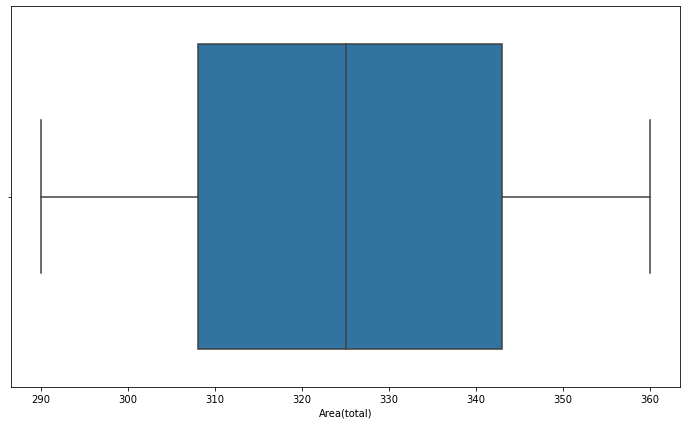

In [33]:
figs,axes = plt.subplots(figsize=(12,7))
sns.boxplot(df['Area(total)'])

In [34]:
num_infoo('Expected price')

The mean of the Expected price is 3782.9383333333335
The median of the Expected price is 3771.0
The standard deviation of the Expected price is 567.1899952345067
Number of missing values in the Expected price is 0


<AxesSubplot:xlabel='Expected price'>

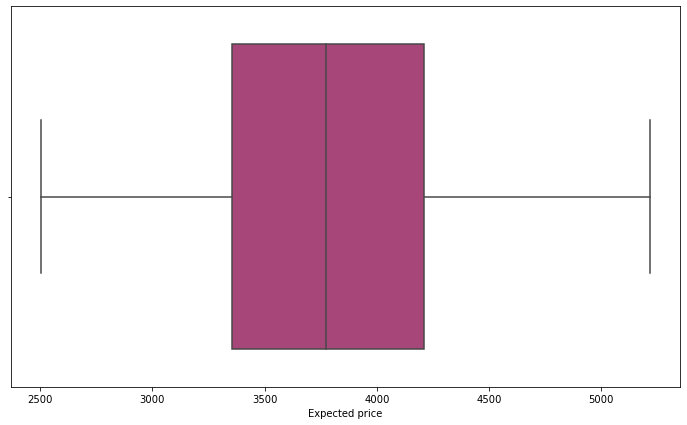

In [35]:
figs,axes = plt.subplots(figsize=(12,7))
sns.boxplot(data=df,x=df['Expected price'],palette='magma')

#Analysis of Target vs Dependent

Here we will see the realtionship of our target variable with the independent variable
1. Expected price vs Grade


2. Grade vs Roof(Area)




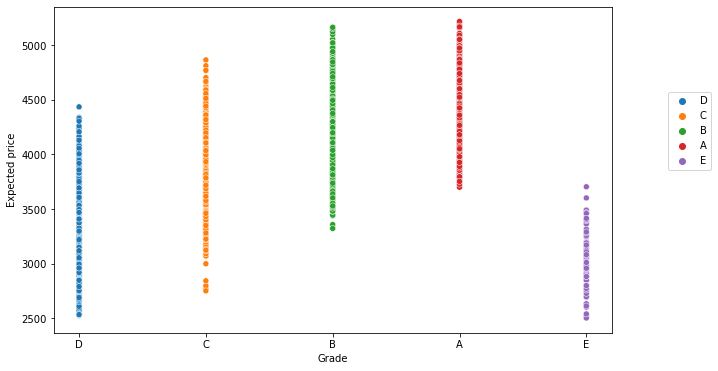

In [38]:
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x=df['Grade'],y=df['Expected price'],hue='Grade')
plt.legend(loc=(1.1,0.5))
plt.show()

Here Grade B houses kinda offers good variety of rooms to the customers and comes with a lesser price tag.


Some Joint Plots to see the data

Bedrooms | Grade | Expected Price

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x432 with 0 Axes>

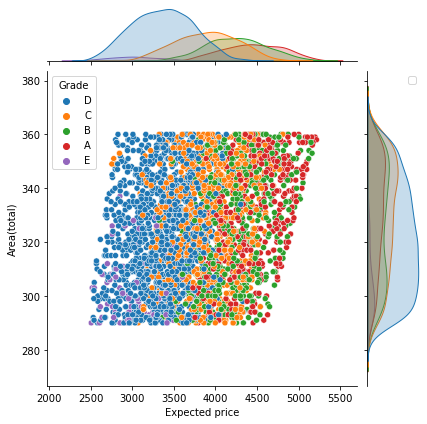

In [39]:
plt.figure(figsize = (10, 6))
sns.jointplot(data=df,y='Area(total)',x="Expected price",hue='Grade')
plt.legend()

<Figure size 1440x864 with 0 Axes>

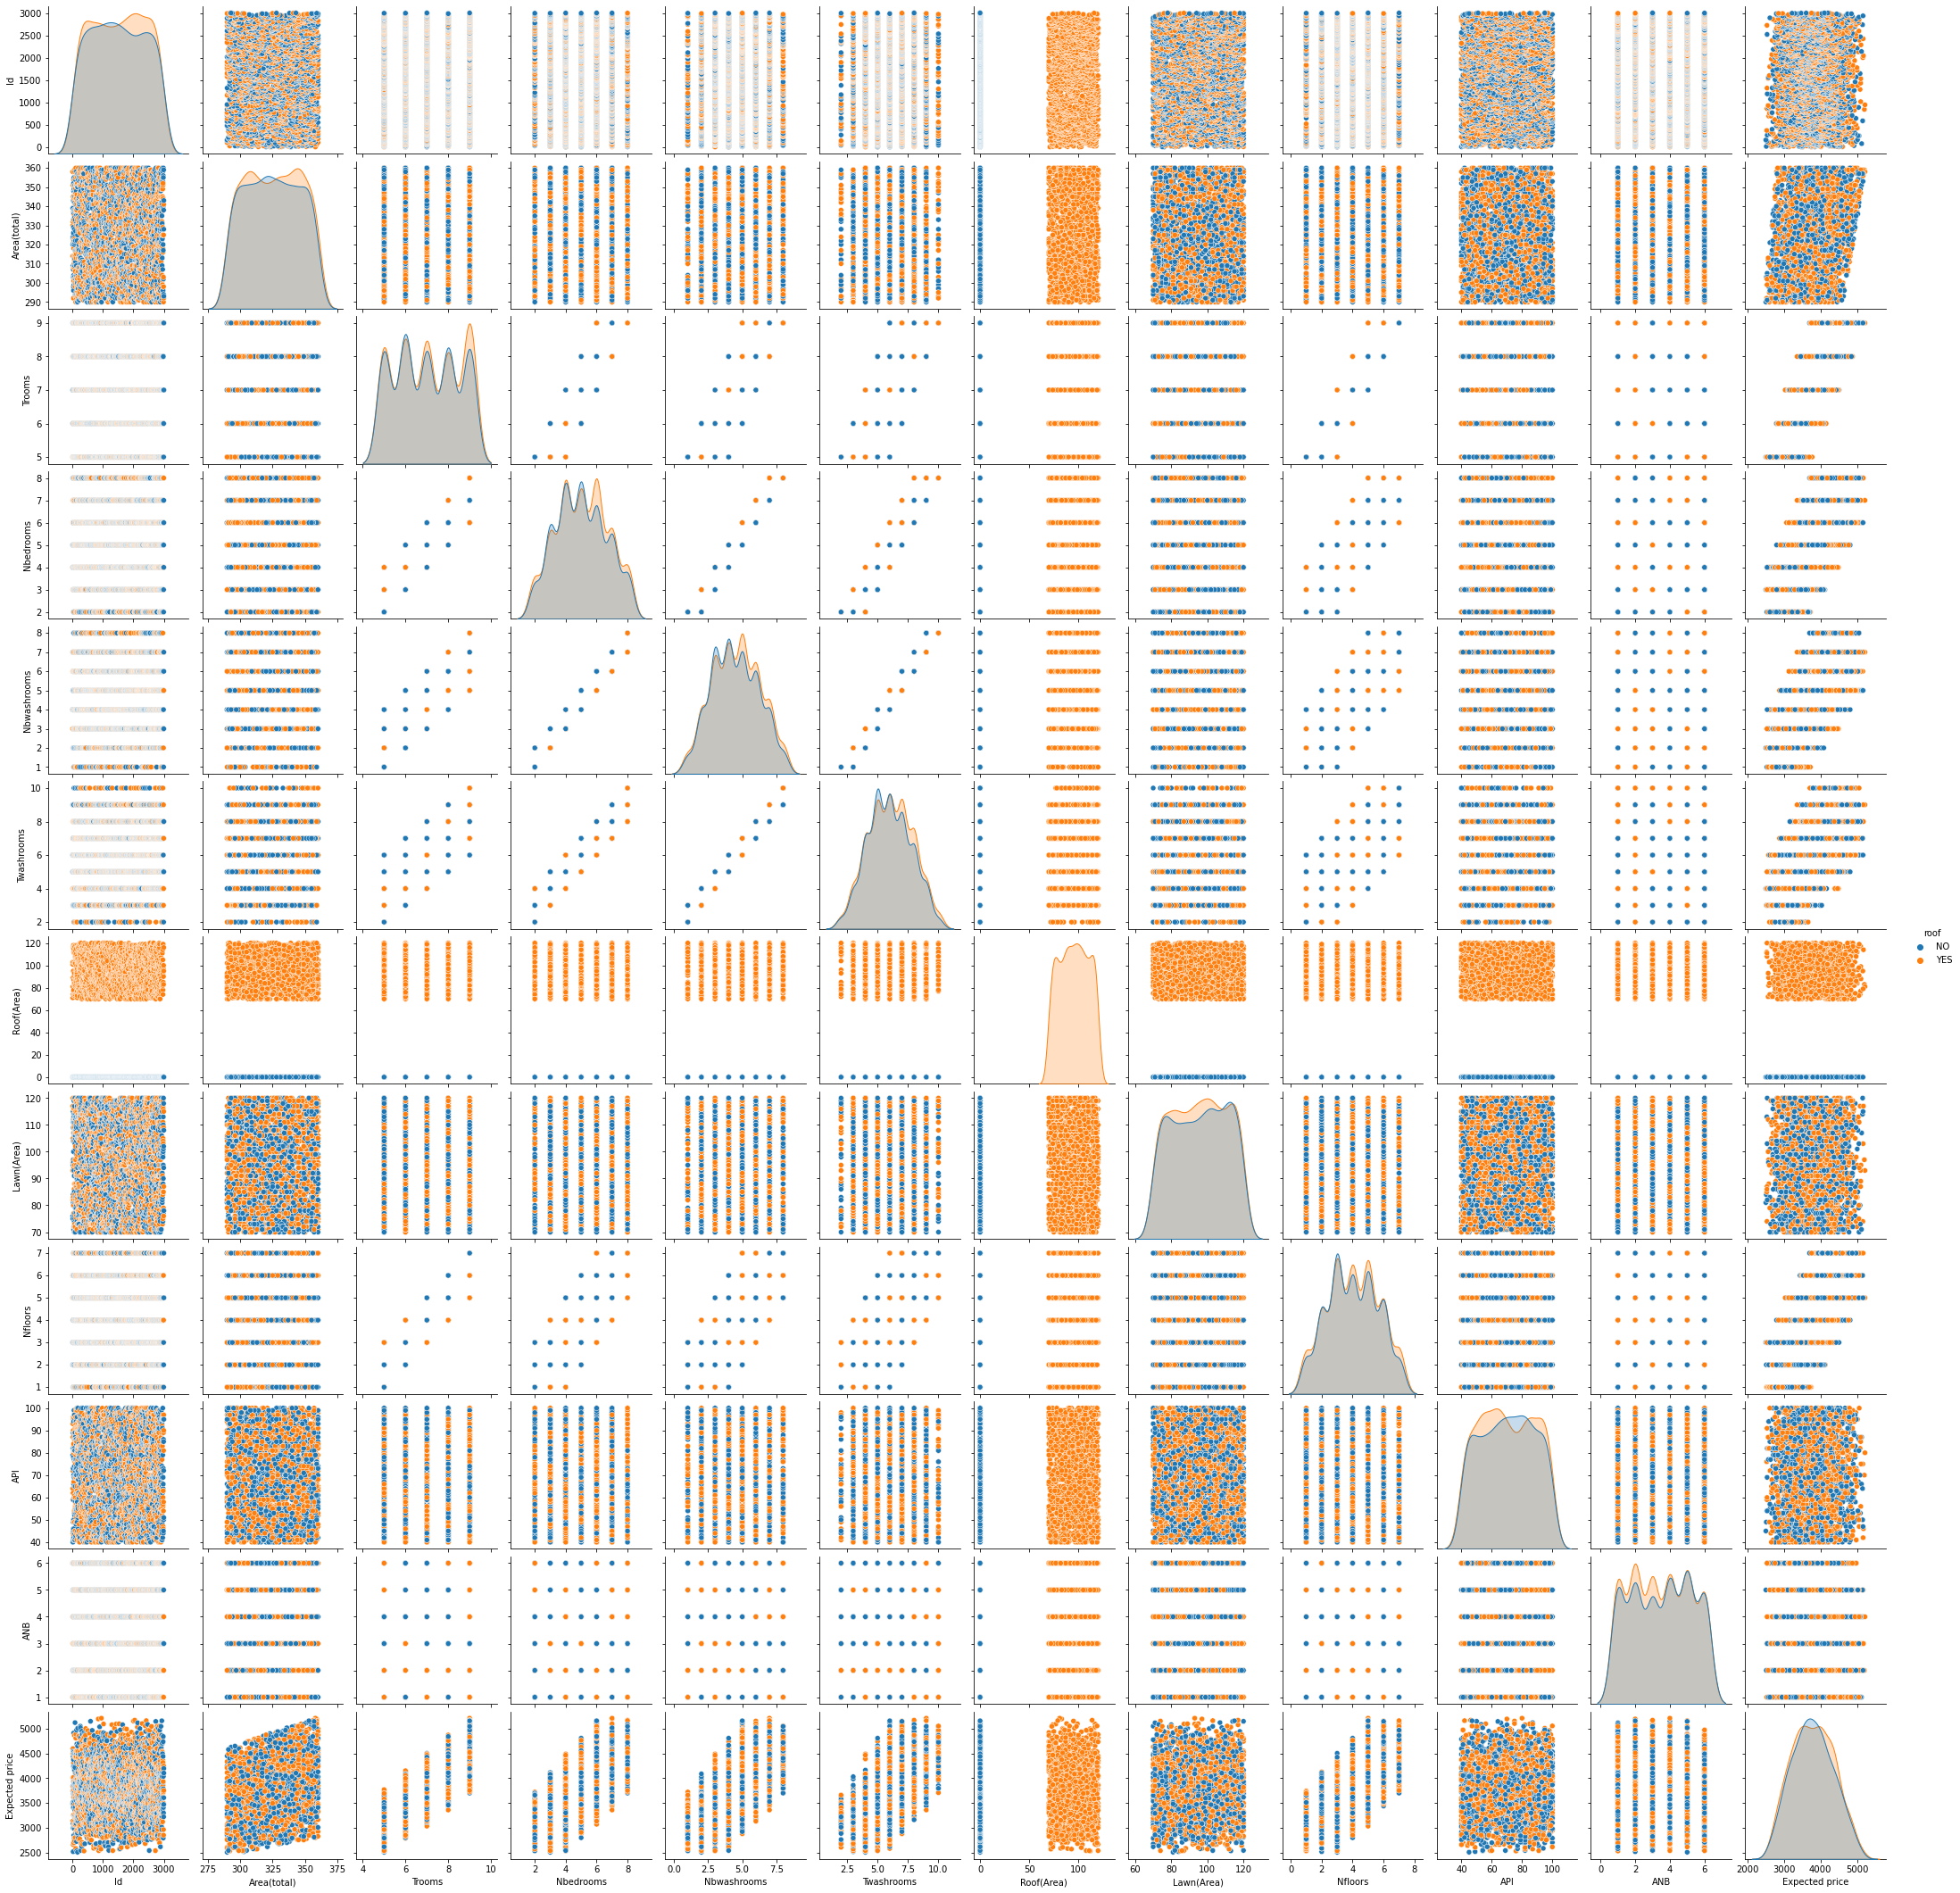

In [41]:
plt.figure(figsize=(20,12))
sns.pairplot(data=df,hue='roof')
plt.show()



Here we doesnt find any business insights so we will see the pairplot with our Target Variable 

Data Transformation


Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [43]:
df['Grade']=label.fit_transform(df['Grade'])
df['roof']=label.fit_transform(df['roof'])
df.head()

Id  Area(total)  Trooms  Nbedrooms  Nbwashrooms  Twashrooms  roof  \
0   1          339       6          5            4           6     0   
1   2          358       5          4            3           4     1   
2   3          324       7          5            4           5     1   
3   4          330       6          4            3           5     1   
4   5          320       7          4            4           5     0   

   Roof(Area)  Lawn(Area)  Nfloors  API  ANB  Expected price  Grade  
0           0          76        2   79    6            3481      3  
1          71          96        3   72    4            3510      3  
2         101         117        5   64    3            3748      2  
3         101          82        2   59    2            3134      3  
4           0          75        3   40    1            3843      3

In [44]:
corr=df.corr()['Grade'].sort_values(ascending=True)
corr

Trooms           -0.875145
Nbedrooms        -0.865389
Nbwashrooms      -0.847319
Twashrooms       -0.819280
Nfloors          -0.787623
Expected price   -0.760820
Area(total)      -0.177332
Roof(Area)       -0.170259
roof             -0.166635
API              -0.099000
Lawn(Area)       -0.051200
ANB              -0.024025
Id               -0.006074
Grade             1.000000
Name: Grade, dtype: float64

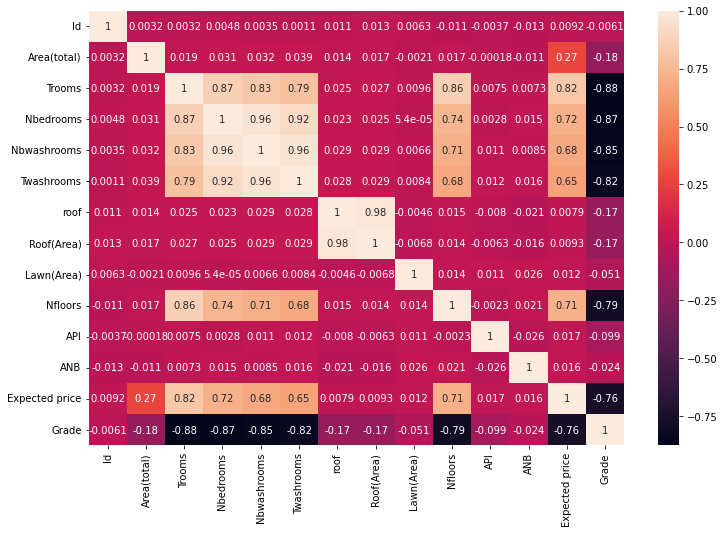

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

Data Processing for Classification

Scaling of Data
Test | Train Split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X=df.drop(columns='Grade')
y=df['Grade']

Scaling the dependent data that would give the prediction .


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scale=StandardScaler()

In [50]:
X1=X.copy()
X2=scale.fit_transform(X1)
X=pd.DataFrame(X2,columns=X1.columns)
X.head()

Id  Area(total)    Trooms  Nbedrooms  Nbwashrooms  Twashrooms  \
0 -1.731474     0.677077 -0.718985  -0.014071    -0.299518   -0.005973   
1 -1.730319     1.603710 -1.422722  -0.625854    -0.882616   -1.125895   
2 -1.729164    -0.054476 -0.015248  -0.014071    -0.299518   -0.565934   
3 -1.728009     0.238145 -0.718985  -0.625854    -0.882616   -0.565934   
4 -1.726855    -0.249557 -0.015248  -0.625854    -0.299518   -0.565934   

       roof  Roof(Area)  Lawn(Area)   Nfloors       API       ANB  \
0 -1.029090   -1.004968   -1.321837 -1.241831  0.501655  1.488214   
1  0.971733    0.451785    0.026334 -0.625028  0.103034  0.307560   
2  0.971733    1.067315    1.441914  0.608580 -0.352533 -0.282766   
3  0.971733    1.067315   -0.917385 -1.241831 -0.637262 -0.873093   
4 -1.029090   -1.004968   -1.389245 -0.625028 -1.719234 -1.463420   

   Expected price  
0       -0.532429  
1       -0.481292  
2       -0.061609  
3       -1.144319  
4        0.105911

Spliting the Data

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)
print(x_train.shape)
print(x_test.shape)

(2100, 13)
(900, 13)


Model Making and Evaluating their Performances¶

We will Evaluate different models and choose the model that will give the best accuracy in classifying our data¶

In [52]:
names=[]
result=[]
roc=[]

Ploting the target and One of the independent variables


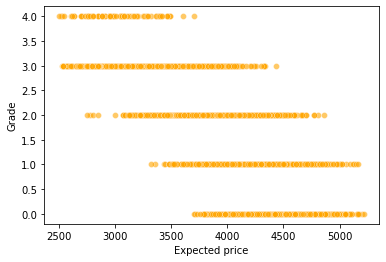

In [53]:
sns.scatterplot(data=df,y='Grade',x='Expected price',alpha=0.6,color='orange');

We can Comprehend that the Target Variable is in 5 Class so we would apply Classification Models.

Model 1 : Logistic Regression


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [55]:
model_logictic=LogisticRegression()
names.append(model_logictic)

Training model , Prediction , and printing unique Classification 

In [56]:
model_logictic.fit(x_train,y_train)

y_log=model_logictic.predict(x_test)

np.unique(y_log)

array([0, 1, 2, 3, 4])

# Intercept and Coefficients

In [57]:
print('The Intercept is :',model_logictic.intercept_)

The Intercept is : [-12.61442572   2.35967579   9.0089083    6.90585047  -5.66000883]


In [58]:
model_logictic.coef_

array([[ 0.12505777,  3.01296347,  6.45433103,  4.73706513,  3.48375235,
         2.5928055 ,  1.29150414,  1.8105163 ,  1.00705716,  3.68488502,
         2.11752905,  0.38720404,  0.96879636],
       [-0.11697842,  1.8098355 ,  3.04226561,  1.67108108,  1.36743908,
         1.10588962,  0.60538804,  1.24417575,  0.57935855,  1.51469544,
         1.23468874,  0.17395128,  0.51910554],
       [-0.04281783,  0.56789893, -0.66267562, -0.50432601,  0.02069499,
        -0.28386469,  0.08222507,  0.49036634,  0.25132751, -0.40862037,
         0.4413904 ,  0.20143671,  0.19965386],
       [-0.05997664, -1.54270969, -4.10041257, -2.35600621, -1.85422571,
        -1.22093476, -0.25900818, -1.31596177, -0.38689654, -2.11225729,
        -1.02418608, -0.16307359, -0.51774435],
       [ 0.09471512, -3.84798821, -4.73350845, -3.547814  , -3.01766071,
        -2.19389566, -1.72010907, -2.22909662, -1.45084668, -2.6787028 ,
        -2.76942212, -0.59951843, -1.16981142]])

The Score (efficiency of the model) 

In [59]:
print('The Score of Model on Training Dataset : ',model_logictic.score(x_train,y_train))

The Score of Model on Training Dataset :  0.96


In [60]:
result.append(model_logictic.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_logictic.score(x_test,y_test))

The Score of Model on Testing Dataset :  0.9555555555555556


In [61]:
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_log),4)*100,'%')

The Accuracy Score of the Model :  95.56 %


In [62]:
## Counting Each Classes :

from collections import Counter

x=0,1,2,3,4

count=Counter(y_log)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Class 0 : 126 
Class 1 : 173 
Class 2 : 207 
Class 3 : 374 
Class 4 : 20 


Confusion Matrix and Plot


[[124   5   0   0   0]
 [  2 163   9   0   0]
 [  0   5 192   5   0]
 [  0   0   6 364   3]
 [  0   0   0   5  17]]

 Plot of Confusion Matrix : 



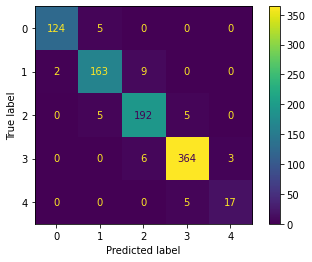

In [63]:
print(confusion_matrix(y_test,y_log))

print('\n Plot of Confusion Matrix : \n')
plot_confusion_matrix(model_logictic,x_test,y_test)
plt.show()

Classification Report

print(classification_report(y_test,y_log))

#The Coefficient for different Class for different Features .¶

In [64]:
pd.DataFrame(model_logictic.coef_,columns=X.columns)

Id  Area(total)    Trooms  Nbedrooms  Nbwashrooms  Twashrooms  \
0  0.125058     3.012963  6.454331   4.737065     3.483752    2.592805   
1 -0.116978     1.809835  3.042266   1.671081     1.367439    1.105890   
2 -0.042818     0.567899 -0.662676  -0.504326     0.020695   -0.283865   
3 -0.059977    -1.542710 -4.100413  -2.356006    -1.854226   -1.220935   
4  0.094715    -3.847988 -4.733508  -3.547814    -3.017661   -2.193896   

       roof  Roof(Area)  Lawn(Area)   Nfloors       API       ANB  \
0  1.291504    1.810516    1.007057  3.684885  2.117529  0.387204   
1  0.605388    1.244176    0.579359  1.514695  1.234689  0.173951   
2  0.082225    0.490366    0.251328 -0.408620  0.441390  0.201437   
3 -0.259008   -1.315962   -0.386897 -2.112257 -1.024186 -0.163074   
4 -1.720109   -2.229097   -1.450847 -2.678703 -2.769422 -0.599518   

   Expected price  
0        0.968796  
1        0.519106  
2        0.199654  
3       -0.517744  
4       -1.169811

For predicting the Grade A houses :

In [66]:
pd.DataFrame(model_logictic.coef_[0].reshape(-1,1),columns=['Coefficient'],index=X.columns).sort_values(by='Coefficient',ascending=False)

Coefficient
Trooms             6.454331
Nbedrooms          4.737065
Nfloors            3.684885
Nbwashrooms        3.483752
Area(total)        3.012963
Twashrooms         2.592805
API                2.117529
Roof(Area)         1.810516
roof               1.291504
Lawn(Area)         1.007057
Expected price     0.968796
ANB                0.387204
Id                 0.125058

Model 2 : Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
model_decision=DecisionTreeClassifier()


In [69]:
names.append(model_decision)

Training model , Prediction , and printing unique Classification :

In [70]:
model_decision.fit(x_train,y_train)

y_dec=model_decision.predict(x_test)

np.unique(y_dec)

array([0, 1, 2, 3, 4])

The Score (efficiency of the model) :

In [71]:
print('The Score of Model on Training Dataset : ',model_decision.score(x_train,y_train))

The Score of Model on Training Dataset :  1.0


In [72]:
result.append(model_decision.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_decision.score(x_test,y_test))

The Score of Model on Testing Dataset :  0.8211111111111111


In [73]:
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_dec),4)*100,'%')

The Accuracy Score of the Model :  82.11 %


Count Each Class Predictions :

In [74]:
## Counting Each Classes :

from collections import Counter

x=0,1,2,3,4

count=Counter(y_dec)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Class 0 : 128 
Class 1 : 166 
Class 2 : 208 
Class 3 : 374 
Class 4 : 24 


Feature Importances

In [75]:
model_decision.feature_importances_

array([0.02451103, 0.09972005, 0.41675063, 0.08044317, 0.10044786,
       0.0226251 , 0.02062059, 0.06125809, 0.04138288, 0.02565156,
       0.06742478, 0.00759403, 0.03157024])

In [76]:
pd.DataFrame(model_decision.feature_importances_,index=X.columns,columns=['Feature Importances']).sort_values(by='Feature Importances',ascending=False)

Feature Importances
Trooms                     0.416751
Nbwashrooms                0.100448
Area(total)                0.099720
Nbedrooms                  0.080443
API                        0.067425
Roof(Area)                 0.061258
Lawn(Area)                 0.041383
Expected price             0.031570
Nfloors                    0.025652
Id                         0.024511
Twashrooms                 0.022625
roof                       0.020621
ANB                        0.007594

Confusion Matrix and Plot

[[111  18   0   0   0]
 [ 17 132  25   0   0]
 [  0  16 153  33   0]
 [  0   0  30 331  12]
 [  0   0   0  10  12]]

 Plot of Confusion Matrix : 



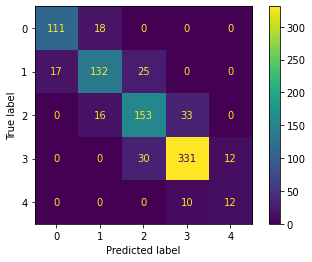

In [77]:
print(confusion_matrix(y_test,y_dec))

print('\n Plot of Confusion Matrix : \n')
plot_confusion_matrix(model_decision,x_test,y_test)
plt.show()

Classification Report

In [78]:
print(classification_report(y_test,y_dec))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       129
           1       0.80      0.76      0.78       174
           2       0.74      0.76      0.75       202
           3       0.89      0.89      0.89       373
           4       0.50      0.55      0.52        22

    accuracy                           0.82       900
   macro avg       0.76      0.76      0.76       900
weighted avg       0.82      0.82      0.82       900



Plotting Decsion Tree 

In [83]:
from sklearn.tree import plot_tree

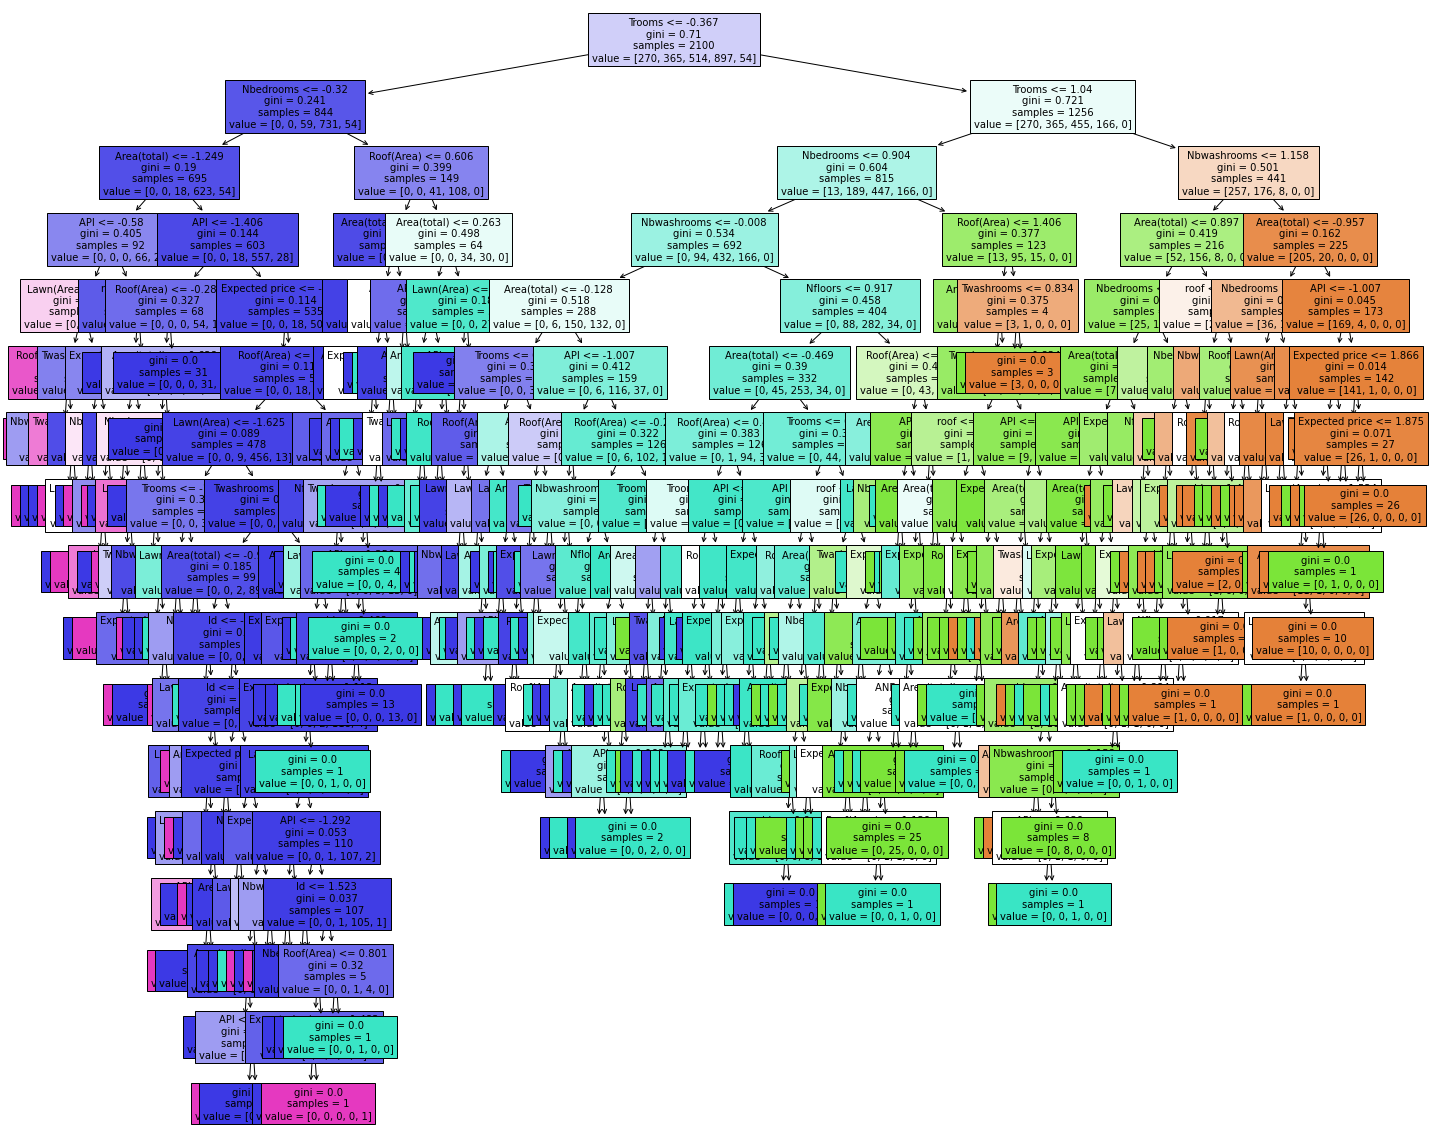

In [84]:
plt.figure(figsize=(20,16))
plot_tree(model_decision,fontsize=10,feature_names=X.columns,filled=True)
plt.tight_layout()
plt.show()

Model 3: Naive Bayes ( GuassianNB )

In [85]:
from sklearn.naive_bayes import GaussianNB 

In [86]:
model_naive=GaussianNB()

In [87]:
names.append(model_naive)


Training model , Prediction , and printing unique Classification :

In [88]:
model_naive.fit(x_train,y_train)

y_naive=model_naive.predict(x_test)

np.unique(y_naive)

array([0, 1, 2, 3, 4])

The Score (efficiency of the model) :

In [89]:
print('The Score of Model on Training Dataset : ',model_naive.score(x_train,y_train))

The Score of Model on Training Dataset :  0.8052380952380952


In [90]:
result.append(model_naive.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_naive.score(x_test,y_test))

The Score of Model on Testing Dataset :  0.7933333333333333


In [91]:
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_naive),4)*100,'%')

The Accuracy Score of the Model :  79.33 %


### Count Each Class Predictions :

In [92]:
## Counting Each Classes :

from collections import Counter

x=0,1,2,3,4

count=Counter(y_naive)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Class 0 : 123 
Class 1 : 186 
Class 2 : 213 
Class 3 : 353 
Class 4 : 25 


Confusion Matrix and Plot

[[107  22   0   0   0]
 [ 16 134  24   0   0]
 [  0  30 142  30   0]
 [  0   0  47 316  10]
 [  0   0   0   7  15]]

 Plot of Confusion Matrix : 



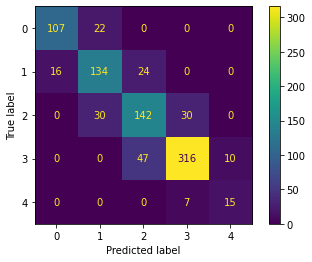

In [93]:
print(confusion_matrix(y_test,y_naive))

print('\n Plot of Confusion Matrix : \n')
plot_confusion_matrix(model_naive,x_test,y_test)
plt.show()

Classification Report

In [94]:
print(classification_report(y_test,y_naive))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       129
           1       0.72      0.77      0.74       174
           2       0.67      0.70      0.68       202
           3       0.90      0.85      0.87       373
           4       0.60      0.68      0.64        22

    accuracy                           0.79       900
   macro avg       0.75      0.77      0.76       900
weighted avg       0.80      0.79      0.80       900



Feature Importances

In [95]:
from sklearn.inspection import permutation_importance

In [96]:
importance=permutation_importance(model_naive,x_test,y_test)
importance

{'importances_mean': array([-0.00111111,  0.01422222,  0.18533333,  0.12355556,  0.08555556,
         0.04555556, -0.00133333,  0.00777778, -0.00266667,  0.04977778,
         0.00066667, -0.00088889,  0.02311111]),
 'importances_std': array([0.00121716, 0.00429757, 0.01616886, 0.00668147, 0.00937557,
        0.0067036 , 0.0030952 , 0.00506745, 0.00180534, 0.00679143,
        0.00193729, 0.0030952 , 0.00367843]),
 'importances': array([[-0.00111111,  0.        ,  0.        , -0.00333333, -0.00111111],
        [ 0.01      ,  0.01777778,  0.01444444,  0.02      ,  0.00888889],
        [ 0.16333333,  0.18444444,  0.20444444,  0.20222222,  0.17222222],
        [ 0.12666667,  0.11555556,  0.13111111,  0.12888889,  0.11555556],
        [ 0.07222222,  0.09555556,  0.08666667,  0.09555556,  0.07777778],
        [ 0.03555556,  0.05222222,  0.05333333,  0.04555556,  0.04111111],
        [ 0.00222222, -0.00555556, -0.00444444,  0.        ,  0.00111111],
        [ 0.01444444,  0.00777778, -0.001111

pd.DataFrame(importance.importances_mean,index=X.columns,columns=['Importances']).sort_values(by='Importances',ascending=False)

4. Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [99]:
model_random=RandomForestClassifier()

In [100]:
names.append(model_random)

Training model , Prediction , and printing unique Classification :

In [101]:
model_random.fit(x_train,y_train)

y_rand=model_random.predict(x_test)

np.unique(y_rand)

array([0, 1, 2, 3, 4])

The Score (efficiency of the model) :

In [104]:
print('The Score of Model on Training Dataset : ',model_random.score(x_train,y_train))

The Score of Model on Training Dataset :  1.0


In [105]:
result.append(model_random.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_random.score(x_test,y_test))

The Score of Model on Testing Dataset :  0.8888888888888888


In [106]:
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_rand),4)*100,'%')

The Accuracy Score of the Model :  88.89 %


Count Each Class Predictions :

In [107]:
## Counting Each Classes :

from collections import Counter

x=0,1,2,3,4

count=Counter(y_rand)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Class 0 : 123 
Class 1 : 165 
Class 2 : 203 
Class 3 : 400 
Class 4 : 9 


Feature Importances :

In [108]:
model_random.feature_importances_

array([0.04036485, 0.07996155, 0.17225276, 0.1312056 , 0.14397497,
       0.08447435, 0.02066096, 0.04203799, 0.04070321, 0.073512  ,
       0.0559517 , 0.02094797, 0.09395209])

In [109]:
model_random.base_estimator_

DecisionTreeClassifier()

In [110]:
pd.DataFrame(model_random.feature_importances_,index=X.columns,columns=['Feature Importances']).sort_values(by='Feature Importances',ascending=False)

Feature Importances
Trooms                     0.172253
Nbwashrooms                0.143975
Nbedrooms                  0.131206
Expected price             0.093952
Twashrooms                 0.084474
Area(total)                0.079962
Nfloors                    0.073512
API                        0.055952
Roof(Area)                 0.042038
Lawn(Area)                 0.040703
Id                         0.040365
ANB                        0.020948
roof                       0.020661

### Confusion Matrix and Plot 

[[113  16   0   0   0]
 [ 10 143  21   0   0]
 [  0   6 172  24   0]
 [  0   0  10 363   0]
 [  0   0   0  13   9]]

 Plot of Confusion Matrix : 



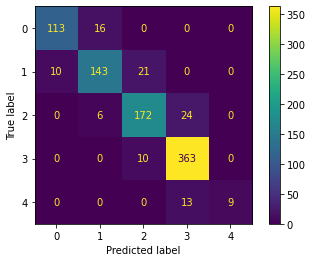

In [112]:
print(confusion_matrix(y_test,y_rand))

print('\n Plot of Confusion Matrix : \n')
plot_confusion_matrix(model_random,x_test,y_test)
plt.show()

### Classification Report

In [113]:
print(classification_report(y_test,y_rand))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       129
           1       0.87      0.82      0.84       174
           2       0.85      0.85      0.85       202
           3       0.91      0.97      0.94       373
           4       1.00      0.41      0.58        22

    accuracy                           0.89       900
   macro avg       0.91      0.79      0.82       900
weighted avg       0.89      0.89      0.89       900



Plotting Decsion Tree 

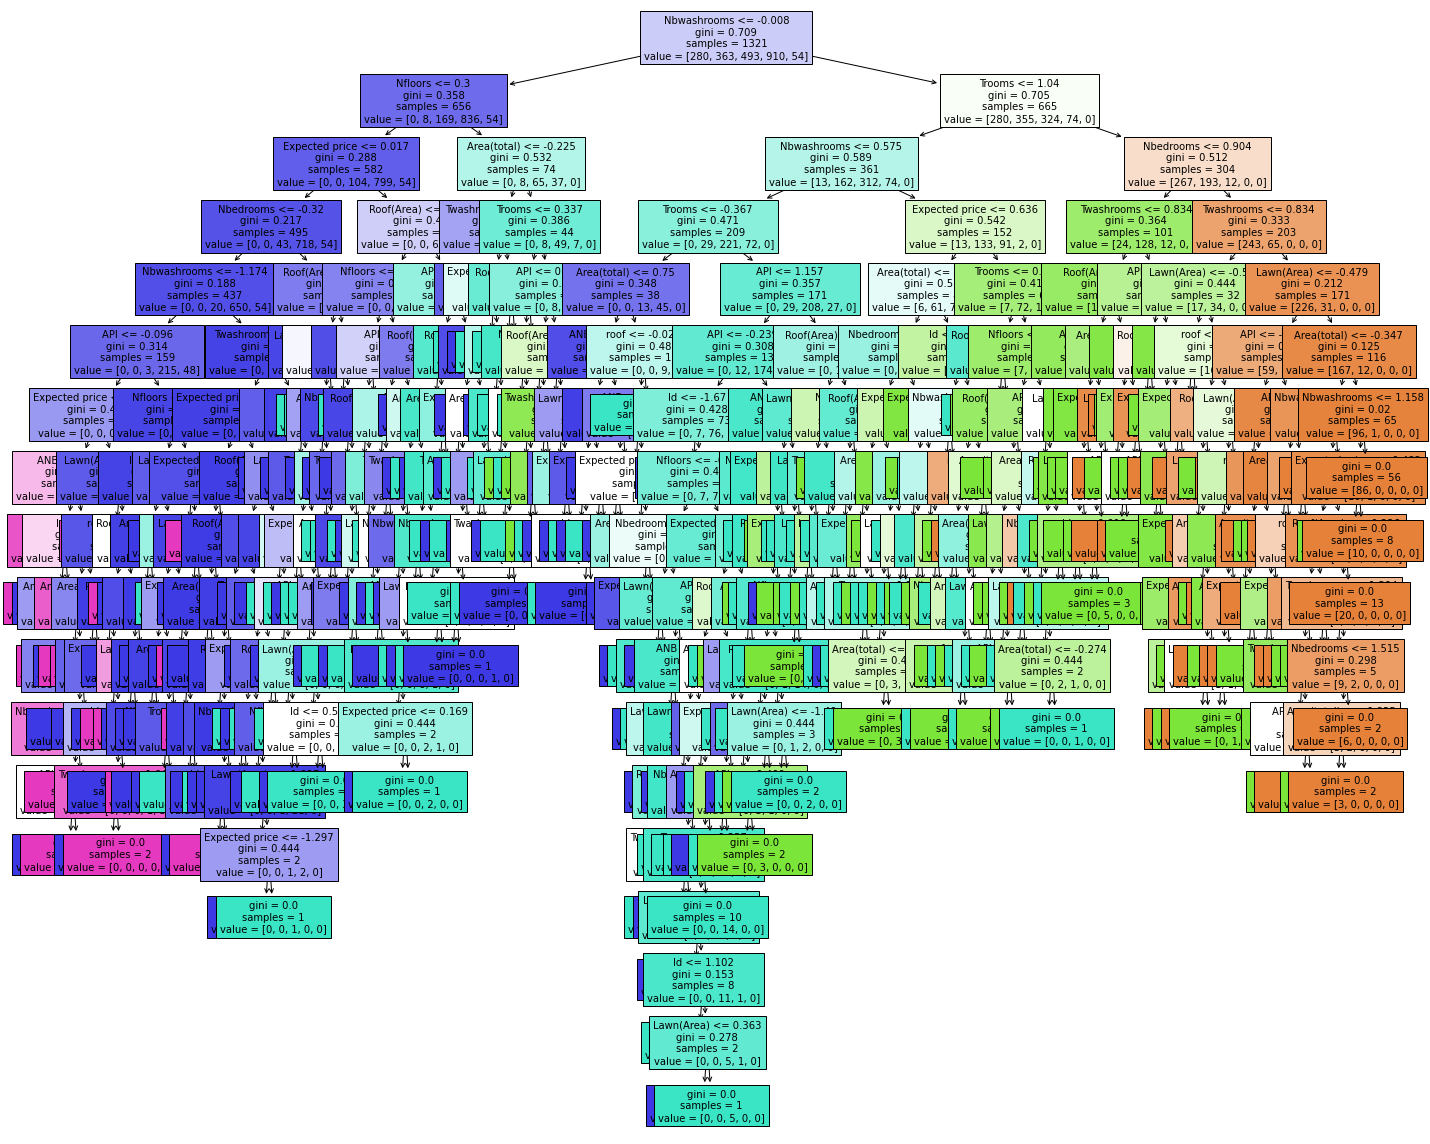

In [117]:
plt.figure(figsize=(20,16))
plot_tree(model_random[0],fontsize=10,feature_names=X.columns,filled=True)
plt.tight_layout()
plt.show()

Model 5 : SVC¶

In [118]:
model_svc=SVC()

In [119]:
names.append(model_svc)

Training model , Prediction , and printing unique Classification :

In [120]:
model_svc.fit(x_train,y_train)

y_svc=model_svc.predict(x_test)

print('Unique Classes')
print(np.unique(y_svc),'\n')

x=np.unique(y_svc)

count=Counter(y_svc)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Unique Classes
[0 1 2 3 4] 

Class 0 : 129 
Class 1 : 176 
Class 2 : 199 
Class 3 : 379 
Class 4 : 17 


The Score (efficiency of the model) :

In [121]:
print('The Score of Model on Training Dataset : ',model_svc.score(x_train,y_train))
result.append(model_svc.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_svc.score(x_test,y_test))
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_svc),4)*100,'%')

The Score of Model on Training Dataset :  0.9661904761904762
The Score of Model on Testing Dataset :  0.9488888888888889
The Accuracy Score of the Model :  94.89 %


In [122]:
model_svc.intercept_

array([-0.40902615,  0.07873562, -0.15224782,  0.22665065,  0.59713342,
        0.0460087 ,  0.29067905,  0.16600267,  0.37591116,  1.25791499])

In [123]:
model_svc.get_params

<bound method BaseEstimator.get_params of SVC()>

Confusion Matrix and Plot

[[123   6   0   0   0]
 [  6 163   5   0   0]
 [  0   7 187   8   0]
 [  0   0   7 365   1]
 [  0   0   0   6  16]]

 Plot of Confusion Matrix : 



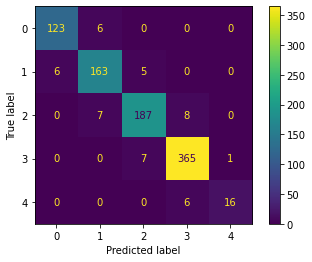

In [124]:
print(confusion_matrix(y_test,y_svc))

print('\n Plot of Confusion Matrix : \n')
plot_confusion_matrix(model_svc,x_test,y_test)
plt.show()

Classification Report

In [125]:
print(classification_report(y_test,y_svc))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       129
           1       0.93      0.94      0.93       174
           2       0.94      0.93      0.93       202
           3       0.96      0.98      0.97       373
           4       0.94      0.73      0.82        22

    accuracy                           0.95       900
   macro avg       0.94      0.90      0.92       900
weighted avg       0.95      0.95      0.95       900



Model 6 : AdaBoostClassifier

In [127]:
model_ada=AdaBoostClassifier()

In [128]:
names.append(model_ada)

Training model , Prediction , and printing unique Classification :

In [129]:
model_ada.fit(x_train,y_train)

y_ada=model_ada.predict(x_test)

print('Unique Classes')
print(np.unique(y_ada),'\n')

x=np.unique(y_ada)

count=Counter(y_ada)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Unique Classes
[0 1 2 3] 

Class 0 : 144 
Class 1 : 115 
Class 2 : 277 
Class 3 : 364 


The Score (efficiency of the model) :

In [130]:
print('The Score of Model on Training Dataset : ',model_ada.score(x_train,y_train))
result.append(model_ada.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_ada.score(x_test,y_test))
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_ada),4)*100,'%')

The Score of Model on Training Dataset :  0.768095238095238
The Score of Model on Testing Dataset :  0.74
The Accuracy Score of the Model :  74.0 %


The Score of Model is really less and the classes predicted are also not according to desired result so we wont consider this model .

Model 7 : Stacking

In [131]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [132]:
def get_stacking():

    level0 = list()
    
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('knive',GaussianNB()))
    

    level1 = LogisticRegression()
    
    model = StackingClassifier(estimators=level0, final_estimator=level1)
    return model

model_stack=get_stacking()

In [133]:
names.append(model_stack)

Training model , Prediction , and printing unique Classification :


In [134]:
model_stack.fit(x_train,y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('svm', SVC()), ('knive', GaussianNB())],
                   final_estimator=LogisticRegression())

In [135]:
y_stack=model_stack.predict(x_test)

np.unique(y_stack)

array([0, 1, 2, 3, 4])

In [136]:
## Counting Each Classes :

from collections import Counter

x=0,1,2,3,4

count=Counter(y_stack)

for i in x:
    print('Class {0} : {1} '.format(i,count[i]))

Class 0 : 128 
Class 1 : 178 
Class 2 : 198 
Class 3 : 379 
Class 4 : 17 


The Score (efficiency of the model) :

In [137]:
print('The Score of Model on Training Dataset : ',model_stack.score(x_train,y_train))
result.append(model_stack.score(x_test,y_test))
print('The Score of Model on Testing Dataset : ',model_stack.score(x_test,y_test))
print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_stack),4)*100,'%')

The Score of Model on Training Dataset :  0.9680952380952381
The Score of Model on Testing Dataset :  0.9444444444444444
The Accuracy Score of the Model :  94.44 %


[[122   7   0   0   0]
 [  6 162   6   0   0]
 [  0   9 185   8   0]
 [  0   0   7 365   1]
 [  0   0   0   6  16]]

 Plot of Confusion Matrix : 



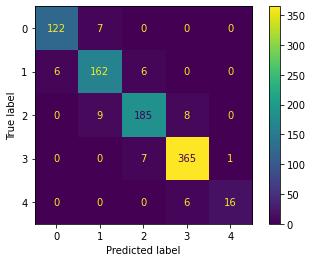

In [138]:
print(confusion_matrix(y_test,y_stack))

print('\n Plot of Confusion Matrix : \n')
plot_confusion_matrix(model_stack,x_test,y_test)
plt.show()

Classification Report

In [139]:
print(classification_report(y_test,y_stack))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       129
           1       0.91      0.93      0.92       174
           2       0.93      0.92      0.93       202
           3       0.96      0.98      0.97       373
           4       0.94      0.73      0.82        22

    accuracy                           0.94       900
   macro avg       0.94      0.90      0.92       900
weighted avg       0.94      0.94      0.94       900



In [140]:
model_stack.feature_names_in_

array(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms',
       'Twashrooms', 'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API',
       'ANB', 'Expected price'], dtype=object)

In [141]:
model_stack._validate_estimators

<bound method _BaseHeterogeneousEnsemble._validate_estimators of StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('svm', SVC()), ('knive', GaussianNB())],
                   final_estimator=LogisticRegression())>

Combining Results of all the model in one Table:

In [145]:
def models(model):

    model_interact=model
    
    model_interact.fit(x_train,y_train)

    y_inter=model_interact.predict(x_test)

    print('\n The Unique Predicted Classes : \n',np.unique(y_inter))
     
    x=np.unique(y_inter)

    count=Counter(y_inter)
    print(' ***********Count of Classes *********\n')
    for i in x:
        
        print('Class {0} : {1} '.format(i,count[i])) 
    
    print('\n************** Accuracy (Score of Model) ***************\n')

    print('The Score of Model on Training Dataset : ',model_interact.score(x_train,y_train))
    print('The Score of Model on Testing Dataset : ',model_interact.score(x_test,y_test),'\n')
    print('The Accuracy Score of the Model : ',round(accuracy_score(y_test,y_inter),4)*100,'%')
    
    print('\n******** Confusion Matrix ********\n')

    print(confusion_matrix(y_test,y_inter))

    print('\n Plot of Confusion Matrix : \n')
    plot_confusion_matrix(model_interact,x_test,y_test)
    plt.show()


    print('\n ********** Classification Report **********\n')

    print(classification_report(y_test,y_inter))

    if model.__class__.__name__== 'LogisticRegression':
        print('\nThe Intercept is :',model_interact.intercept_)
        print('\n The Coefficient for different class for different Features \n')
        print(pd.DataFrame(model_interact.coef_,columns=X.columns))
        

        print('\n Histogram for Prediction of Logistic Regression : \n')
        sns.histplot(y_inter)
        plt.show()

    elif  model.__class__.__name__== 'DecisionTreeClassifier'  :
        print('The DataFrame for Feature Importances\n')
        print('\n',pd.DataFrame(model_interact.feature_importances_,index=X.columns,columns=['Feature Importances']).sort_values(by='Feature Importances',ascending=False))
        plt.figure(figsize=(20,16))
        plot_tree(model_interact,fontsize=10,feature_names=X.columns,filled=True)
        plt.tight_layout()
        plt.show()

    elif  model.__class__.__name__== 'RandomForestClassifier'  :
        print('The DataFrame for Feature Importances\n')
        print('\n',pd.DataFrame(model_interact.feature_importances_,index=X.columns,columns=['Feature Importances']).sort_values(by='Feature Importances',ascending=False))
        plt.figure(figsize=(20,16))
        plot_tree(model_interact[0],fontsize=10,feature_names=X.columns,filled=True)
        plt.tight_layout()
        plt.show()

    elif  model.__class__.__name__== 'GaussianNB' :
        importance=permutation_importance(model_interact,x_test,y_test)
        importance
        print('\nThe DataFrame of Feature Importance\n')
        print(pd.DataFrame(importance.importances_mean,index=X.columns,columns=['Importances']).sort_values(by='Importances',ascending=False))



        